# **Step 1: Import libraries**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Step 2: Load datasets (2015-2019)**

In [144]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# **Step 3: Standardize column names**

In [145]:
rename_map = {
    'Happiness Score': 'Score',
    'Happiness.Score': 'Score',
    'Score': 'Score',
    'Happiness.Rank': 'Rank',
    'Happiness Rank': 'Rank',
    'Overall rank': 'Rank',
    'Country or region': 'Country',
    'Country': 'Country',
    'Economy (GDP per Capita)': 'GDP',
    'Economy..GDP.per.Capita.': 'GDP',
    'GDP per capita': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Health..Life.Expectancy.': 'Health',
    'Healthy life expectancy': 'Health',
    'Family': 'SocialSupport',
    'Social support': 'SocialSupport',
    'Trust (Government Corruption)': 'Corruption',
    'Trust..Government.Corruption.': 'Corruption',
    'Perceptions of corruption': 'Corruption',
    'Region': 'Region'
}

In [146]:
for df in [df_2015, df_2016, df_2017, df_2018, df_2019]:
    df.rename(columns=rename_map, inplace=True)

# **Step 4: Add Year column**

In [147]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# **Step 5: Combine all years**

In [148]:
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [158]:
print(df_all['Year'].unique())

[2015 2016 2017 2018 2019]


In [159]:
print(df_all.groupby('Year')['Score'].count())

Year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Score, dtype: int64


# **Step 6: Correlation Heatmap**

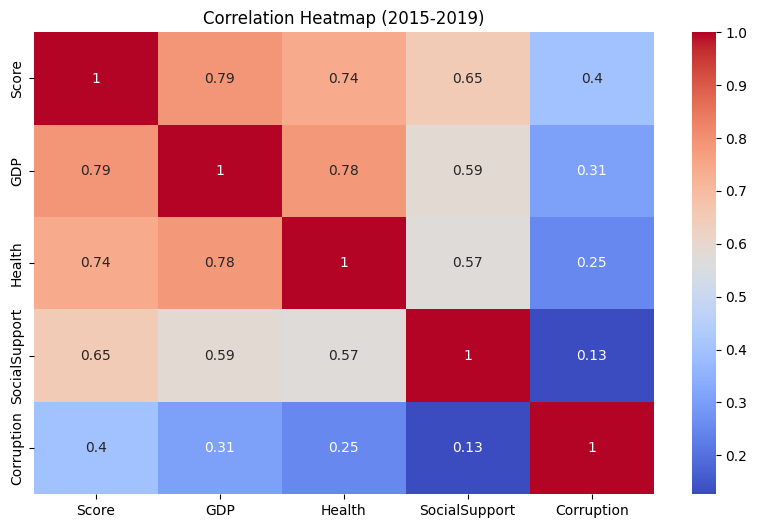

In [149]:
plt.figure(figsize=(10,6))
sns.heatmap(df_all[['Score','GDP','Health','SocialSupport','Corruption']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (2015-2019)')
plt.show()

# **Step 7: Scatterplots**

In [150]:
factors = ['GDP','Health','SocialSupport','Corruption']
plt.figure(figsize=(18,10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

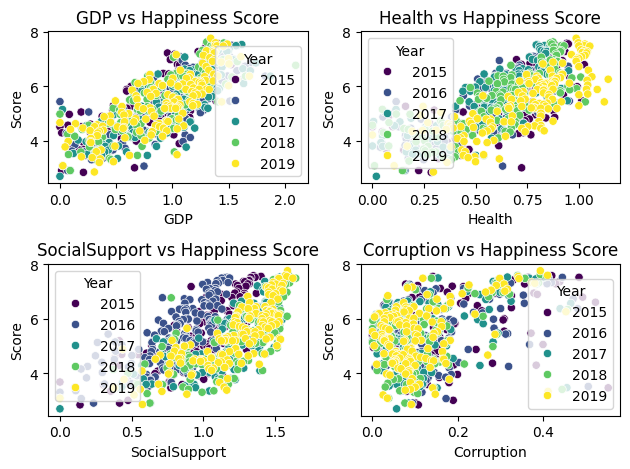

In [151]:
for i, factor in enumerate(factors, 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=factor, y='Score', hue='Year', data=df_all, palette='viridis')
    plt.title(f'{factor} vs Happiness Score')

plt.tight_layout()
plt.show()

## **Step 8: Top 10 & Bottom 10 Countries**

In [152]:
for year in range(2015, 2020):
    df_year = df_all[df_all['Year']==year]
    top10 = df_year.nlargest(10, 'Score')
    bottom10 = df_year.nsmallest(10, 'Score')
    print(f"\n===== Top 10 Happiest Countries - {year} =====")
    print(top10[['Country','Score']])
    print(f"\n===== Bottom 10 Happiest Countries - {year} =====")
    print(bottom10[['Country','Score']])


===== Top 10 Happiest Countries - 2015 =====
       Country  Score
0  Switzerland  7.587
1      Iceland  7.561
2      Denmark  7.527
3       Norway  7.522
4       Canada  7.427
5      Finland  7.406
6  Netherlands  7.378
7       Sweden  7.364
8  New Zealand  7.286
9    Australia  7.284

===== Bottom 10 Happiest Countries - 2015 =====
          Country  Score
157          Togo  2.839
156       Burundi  2.905
155         Syria  3.006
154         Benin  3.340
153        Rwanda  3.465
152   Afghanistan  3.575
151  Burkina Faso  3.587
150   Ivory Coast  3.655
149        Guinea  3.656
148          Chad  3.667

===== Top 10 Happiest Countries - 2016 =====
         Country  Score
158      Denmark  7.526
159  Switzerland  7.509
160      Iceland  7.501
161       Norway  7.498
162      Finland  7.413
163       Canada  7.404
164  Netherlands  7.339
165  New Zealand  7.334
166    Australia  7.313
167       Sweden  7.291

===== Bottom 10 Happiest Countries - 2016 =====
         Country  Score
314  

# **Step 9: Global Comparison by Continent**

In [163]:
country_to_continent = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Congo (Brazzaville)': 'Africa',
    'Congo (Kinshasa)': 'Africa', 'Ivory Coast': 'Africa', 'Djibouti': 'Africa',
    'Egypt': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Rwanda': 'Africa', 'Senegal': 'Africa', 'Sierra Leone': 'Africa', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Sudan': 'Africa',
    'Swaziland': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia', 'Hong Kong': 'Asia',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia',
    'Nepal': 'Asia', 'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Palestinian Territories': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia',
    'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia',
    'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia',
    'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe',
    'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Greece': 'Europe', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe',
    'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Ukraine': 'Europe',
    'United Kingdom': 'Europe',

    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America',
    'Barbados': 'North America', 'Belize': 'North America', 'Canada': 'North America',
    'Costa Rica': 'North America', 'Cuba': 'North America', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'El Salvador': 'North America',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Jamaica': 'North America', 'Mexico': 'North America',
    'Nicaragua': 'North America', 'Panama': 'North America', 'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America', 'United States': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania',
    'Marshall Islands': 'Oceania', 'Micronesia': 'Oceania', 'Nauru': 'Oceania',
    'New Zealand': 'Oceania', 'Palau': 'Oceania', 'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania', 'Solomon Islands': 'Oceania', 'Tonga': 'Oceania',
    'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania'
}

In [165]:
df_all['Continent'] = df_all['Country'].map(country_to_continent).fillna('Unknown')


/tmp/ipython-input-1591052072.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




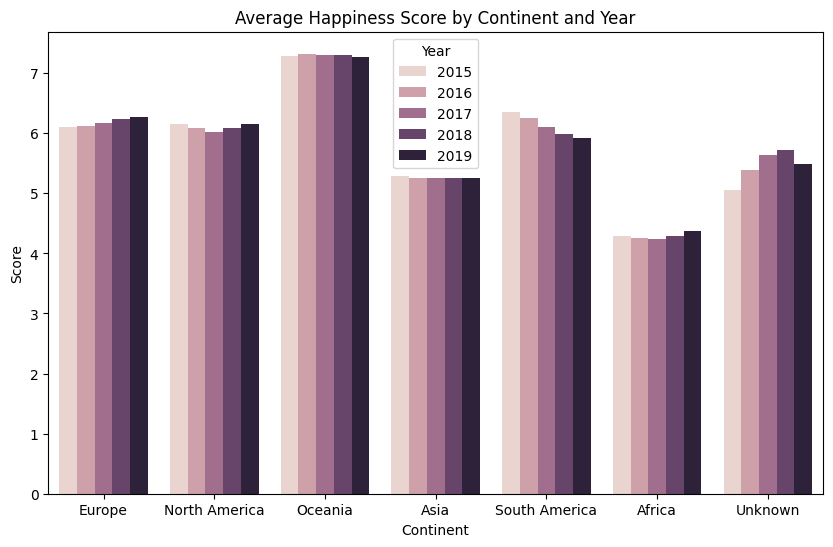

In [166]:
plt.figure(figsize=(10,6))
sns.barplot(x='Continent', y='Score', hue='Year', data=df_all, ci=None)
plt.title('Average Happiness Score by Continent and Year')
plt.show()

# **Step 10: Global Average Happiness Over Time**

<function matplotlib.pyplot.show(close=None, block=None)>

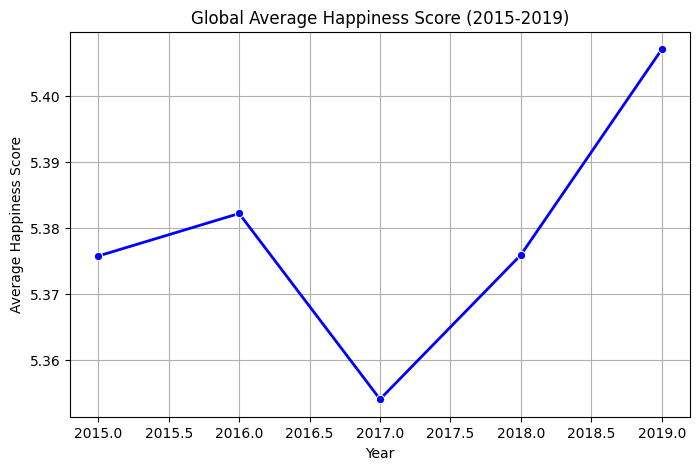

In [156]:
global_avg = df_all.groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Score', data=global_avg, marker='o', linewidth=2, color='blue')
plt.title('Global Average Happiness Score (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.show

# **Step 11: Bubble Map**

In [157]:
fig = px.scatter_geo(df_all,
                     locations="Country",
                     locationmode='country names',
                     color="Score",
                     size="GDP",
                     hover_name="Country",
                     animation_frame="Year",
                     projection="natural earth",
                     title='World Happiness Bubble Map (2015-2019)')
fig.show()